# P(A)CE - ANALYZE STAGE

## Exploratory Data Analysis

Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers we need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques we are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.

The purposes of EDA before constructing a predictive model -

1. To understand which variables are present in the data
2. To consider the distribution of features, such as minimum, mean, and maximum values
3. To plot the relationship between the independent and dependent variables and visualize which features have a linear relationship
4. To identify issues with the data, such as incorrect or missing values.

In [1]:
# Importing the required packages

# Operation packages
import pandas as pd
import numpy as np

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
df = pd.read_csv(r'C:\Users\Dell\Desktop\Projects\Salifort Motors\Datasets\salifort_employee_retention_data.csv')

In [7]:
# showing the first 10 rows
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,0.37,0.52,2,159,3,0,1,0,Sales,Low
5,0.41,0.50,2,153,3,0,1,0,Sales,Low
6,0.10,0.77,6,247,4,0,1,0,Sales,Low
7,0.92,0.85,5,259,5,0,1,0,Sales,Low
8,0.89,1.00,5,224,5,0,1,0,Sales,Low
9,0.42,0.53,2,142,3,0,1,0,Sales,Low


In [8]:
# Showing a random sample of the dataset
df.sample(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
2135,0.64,0.77,3,213,3,1,0,0,Research and Development,Medium
12147,0.11,0.87,6,306,4,0,1,0,IT,Low
14345,0.36,0.50,2,132,3,0,1,0,Technical,Low
466,0.37,0.48,2,134,3,0,1,0,Marketing,Medium
8399,0.71,0.72,4,177,3,0,0,0,Accounting,Low


In [9]:
# looking at the shape of the dataset
df.shape

(14999, 10)

The dataset contains 14999 rows (entries) and 10 columns.

In [10]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   tenure                 14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


The dataset does not have any null values. 'department' and 'salary' columns have object datatypes which needs to be changed into categorical variables.

### Descriptive Statistics

In [11]:
# gathering descriptive statistics
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sales,Low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


From the descriptive statistics we can get the following general idea of the employees-

1. The range of satisfaction-level is 0.09 - 1.00.
2. The range of last_evaluation is 0.36 - 1.00. It doesn't contain information of employees below 0.36 evaluation level.
3. The minimum number of projects is 2 and maximum is 7. There's no information of employees with 0 or 1 project and more than 7 projects.
4. The average_monthly_hours has a wide range with a large standard deviation. Assuming a standard five-day workweek, there are approximately 22.4375 working days in a month on average. Then the minimum daily working hour is 4 hours and maximum daily working hour is 13.81.
5. The dataset contains information only of employees more than 2 years tenure upto 10 years. 
6. There are 10 departments in this company with number of employees in Sales being highest.
7. There are 3 salary types - Low, Medium and High with Low being prominant.
8. **'left' is the most important metric to evaluate the employee retention rate.**

### Checking for Null values

In [46]:
# looking for null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no null values in any column of the dataset.

### Looking for Class Imbalance
Class balance is when a dataset has a predictor variable that contains more instances of one outcome than another. Here our predictor variable is most likely 'left' column which says whether or not an employee left from the company.

In [53]:
# looking for imbalance in the data set
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [60]:
# class imbalance percentage
print("The percentage of majority class is:", round((len(df[df['left']==0])/df.shape[0])* 100, 2),'%')

The percentage of majority class is: 76.19 %


It is clearly an imbalanced dataset. But we consider the dataset is moderately (< 20%) imbalance,so we don't need to rebalance it.

### Checking for duplicate values

In [47]:
# showing the duplicate values
df_duplicated=df[df.duplicated()==True]
df_duplicated

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,Sales,Low
866,0.41,0.46,2,128,3,0,1,0,Accounting,Low
1317,0.37,0.51,2,127,3,0,1,0,Sales,Medium
1368,0.41,0.52,2,132,3,0,1,0,Research and Development,Low
1461,0.42,0.53,2,142,3,0,1,0,Sales,Low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,Support,Low
14995,0.37,0.48,2,160,3,0,1,0,Support,Low
14996,0.37,0.53,2,143,3,0,1,0,Support,Low
14997,0.11,0.96,6,280,4,0,1,0,Support,Low


There are 3008 duplicate values in this dataset. Let's look into our key column 'left' to find any class imbalance in the duplicated rows.

In [48]:
# checking the number of duplicates in 'left' column
df_duplicated['left'].value_counts()

1    1580
0    1428
Name: left, dtype: int64

We were concerned that if we drop the duplicates, the dataset is going to be even more imbalanced. After we count the values of duplicates, we can see both of the classes have the duplicates. But we'll drop the duplicates as they'll affect the perdormance of the machine learning and regression models later.

In [3]:
# dropping the duplicates and save the dataset in a new variable
df_new = df.drop_duplicates()
df_new.reset_index(inplace=True, drop=True)
df_new.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,Low
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium
3,0.72,0.87,5,223,5,0,1,0,Sales,Low
4,0.37,0.52,2,159,3,0,1,0,Sales,Low
5,0.41,0.50,2,153,3,0,1,0,Sales,Low
6,0.10,0.77,6,247,4,0,1,0,Sales,Low
7,0.92,0.85,5,259,5,0,1,0,Sales,Low
8,0.89,1.00,5,224,5,0,1,0,Sales,Low
9,0.42,0.53,2,142,3,0,1,0,Sales,Low


In [52]:
# checking the number of rows in the new dataset
df_new.shape

(11991, 10)

### Class Imbalance of the new dataset

In [61]:
# Class imbalance percentage
print("The percentage of majority class is:", round((len(df_new[df_new['left']==0])/df_new.shape[0])* 100, 2),'%')

The percentage of majority class is: 83.4 %


### Data Visualizations

#### 1. Distribution of numerical datatypes

<function matplotlib.pyplot.show(close=None, block=None)>

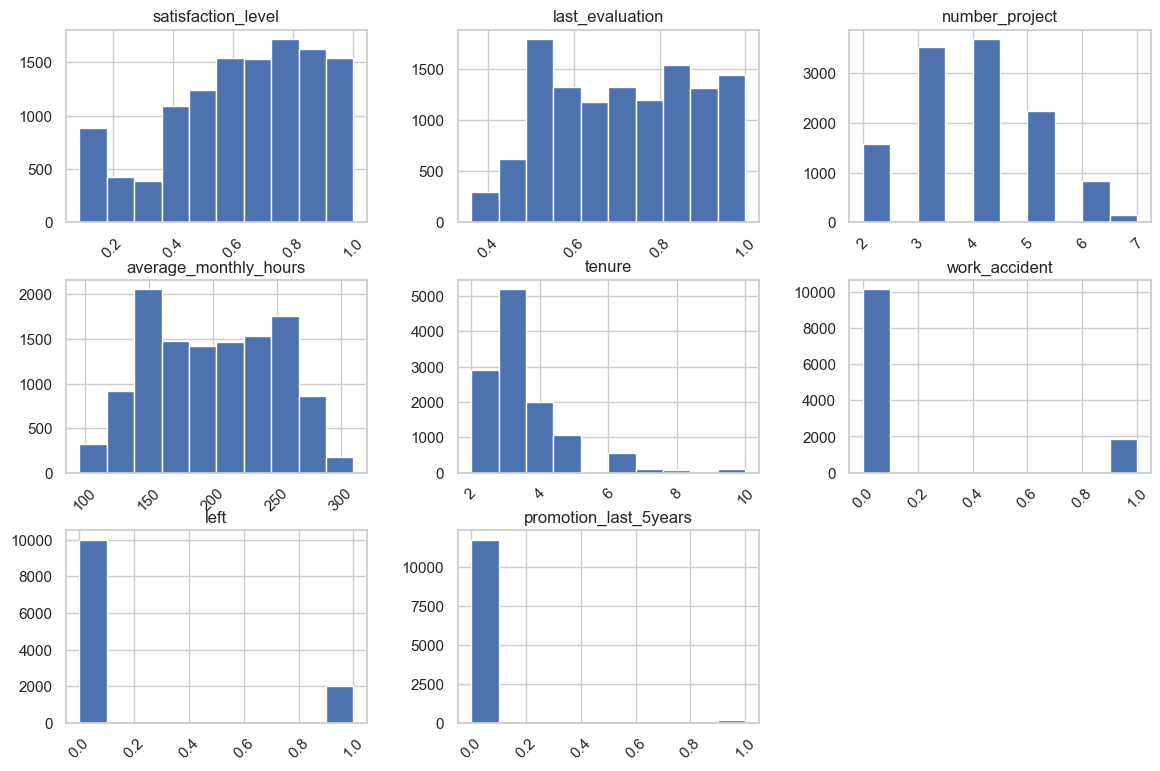

In [7]:
df_new.hist(figsize=(14,9), xrot=45)
plt.show

From the work_accident, left and promotion_last_5years columns we can clearly see that one class (employee who stayed) contains majority of the datapoints than the other class. It shows again that the dataset is highly imbalanced.

#### 2. Distribution of categorical datatypes

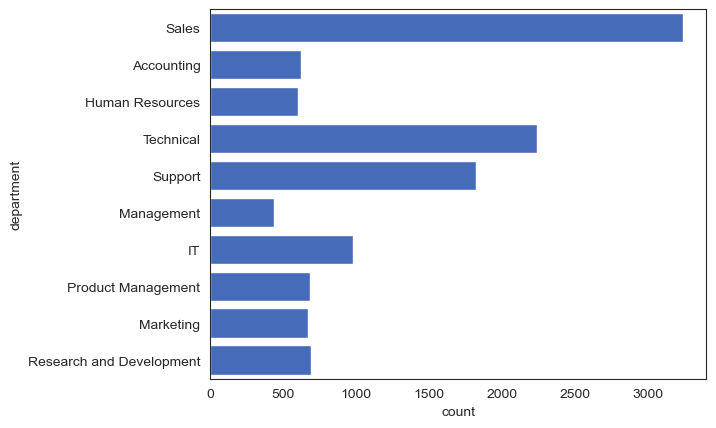

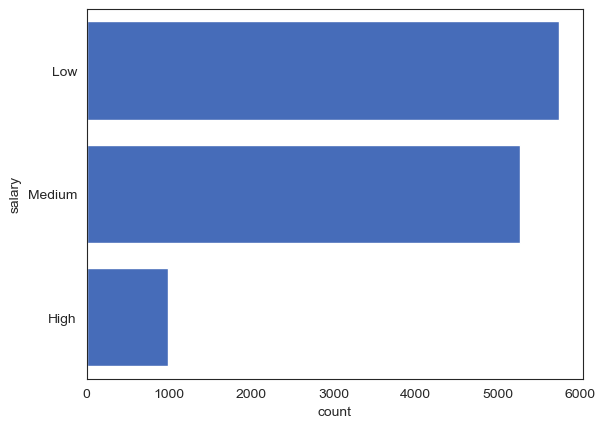

In [46]:
for column in df.select_dtypes(include='object'):
    sns.countplot(y=column, data=df_new, palette=["#3366cc"])
    plt.show()

#### 3. Correlation Matrix and Heatmap

In [5]:
# creating a correlation matrix
corr=df_new.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
tenure,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


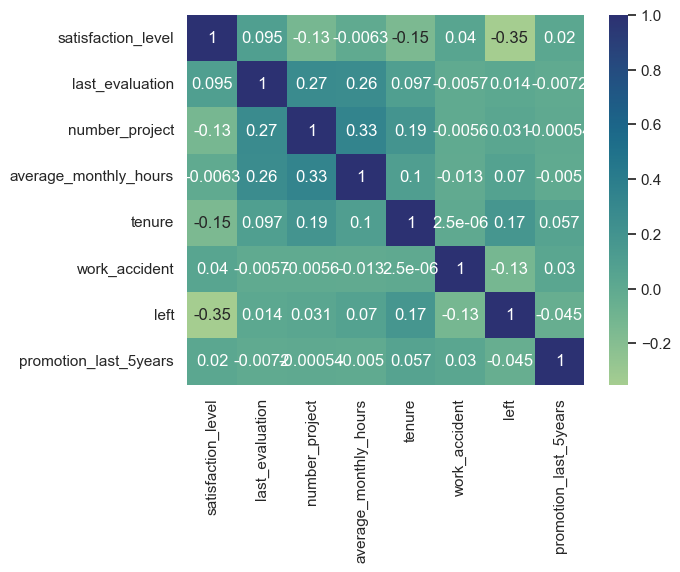

In [6]:
# heatmap of the correlation matrix
sns.heatmap(corr, cmap='crest',annot=True)
plt.show()

As we can see, satisfaction_level has more relationship with left, compared to other variables. In addition, there are no other variables that strongly correlated with 'left' variable.

#### 4. A boxplot and a regplot of employee retention based on the satisfaction_level.

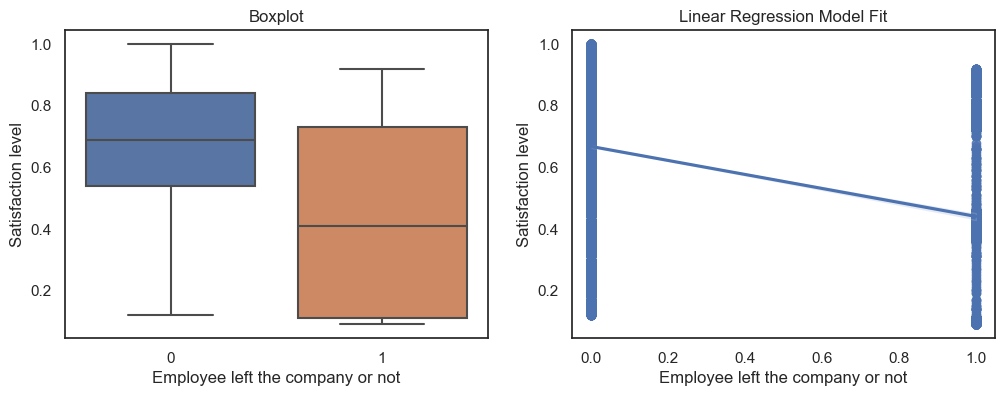

In [15]:
fig, axes =plt.subplots(1,2, figsize=(12,4))
sns.boxplot(x='left',y='satisfaction_level', showfliers=False, data=df_new, ax=axes[0])
axes[0].set_xlabel("Employee left the company or not")
axes[0].set_ylabel("Satisfaction level")
axes[0].set_title("Boxplot for Satisfaction Level vs employee left the company or not")

sns.regplot(x='left',y='satisfaction_level', data=df_new, ax=axes[1])
axes[1].set_xlabel("Employee left the company or not")
axes[1].set_ylabel("Satisfaction level")
axes[1].set_title("Linear Regression Model Fit")

plt.show()

The satisfaction level of employee who've left is lower than those employees who remained in the company.

#### 5. A histplot that shows the overall satisfaction_level for all employees in this dataset.

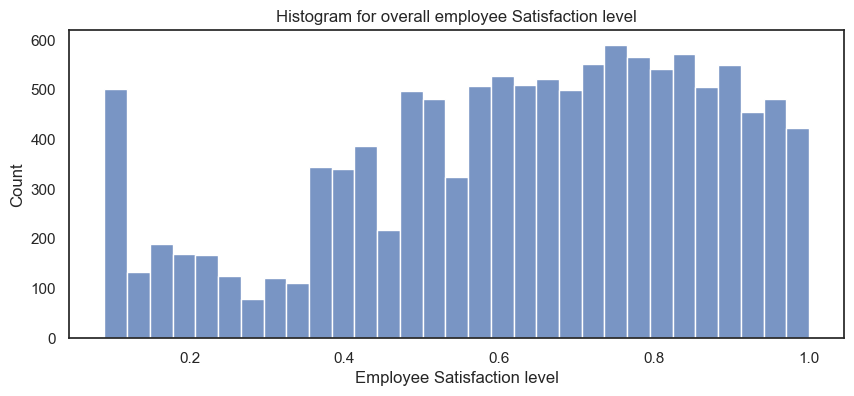

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(data=df_new, x='satisfaction_level')
plt.xlabel('Employee Satisfaction level')
plt.title("Histogram for overall employee Satisfaction level")
plt.show()

From this histogram, we can see that the lowest satisfaction level is below 0.2. Majority of the employees who had a satisfaction level higher than 0.5.

#### 6. Histogram plots of satisfaction_level based on if the employee left.

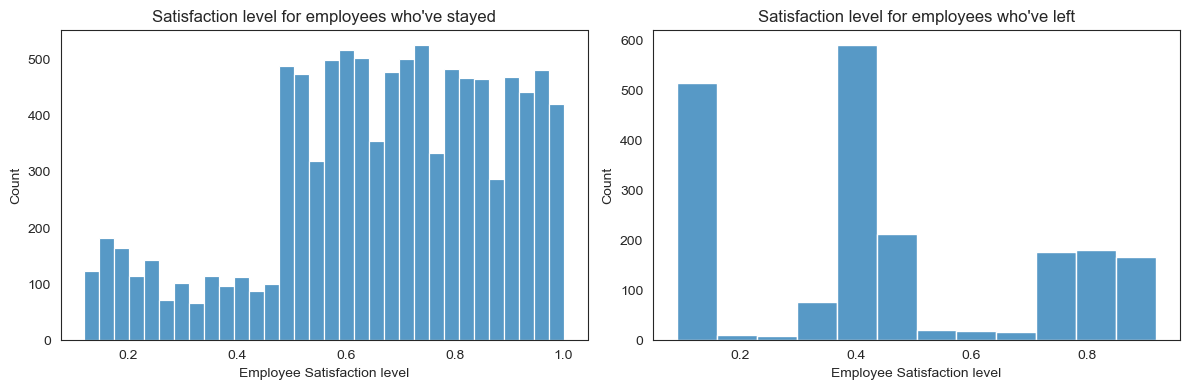

In [30]:
# Creating 2 data frames for employees remained and left 
df_stay = df_new[df_new['left']==0]
df_left = df_new[df_new['left']==1]

# plotting the histograms
fig, axes=plt.subplots(1,2, figsize=(12,4))
sns.histplot(df_stay, x='satisfaction_level', ax=axes[0])
axes[0].set_xlabel('Employee Satisfaction level')
axes[0].set_title('Satisfaction level for employees who\'ve stayed')

sns.histplot(df_left, x='satisfaction_level', ax=axes[1])
axes[1].set_xlabel('Employee Satisfaction level')
axes[1].set_title('Satisfaction level for employees who\'ve left')

plt.tight_layout()
plt.show()

From these histograms we can observe some interesting observations-

1. Some employees who've stayed in the company have given lower satisfaction rate (less than 0.5).
2. Majority of these employees gave a satisfaction rate between 0.5-1.0.
3. The employees who've left the company gave a lower satisfaction rate(<0.4).
4. But there are some employees who've given higher satisfaction rates and still left the company(>0.7).

#### 7. A boxplot of employee retention based on the last_evaluation.

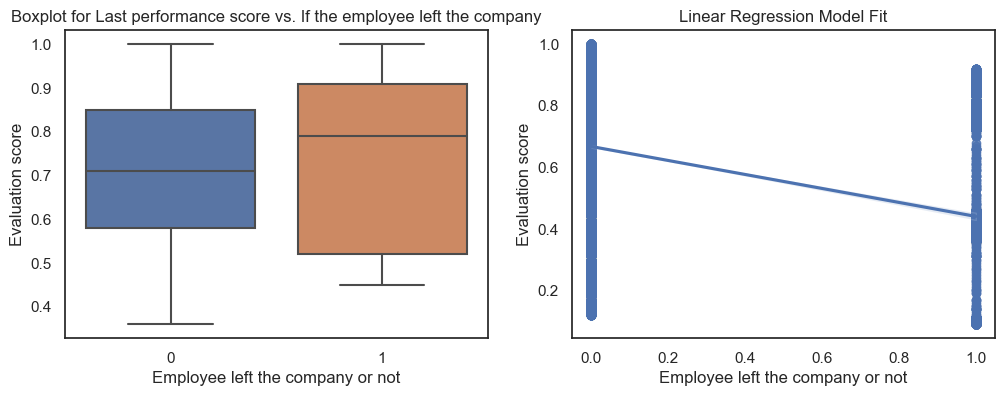

In [22]:
fig,axes = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(df_new, x='left',y='last_evaluation', ax=axes[0])
axes[0].set_xlabel('Employee left the company or not')
axes[0].set_ylabel('Evaluation score')
axes[0].set_title('Boxplot for Last performance score vs. If the employee left the company')

sns.regplot(x='left',y='satisfaction_level', data=df_new, ax=axes[1])
axes[1].set_xlabel("Employee left the company or not")
axes[1].set_ylabel("Evaluation score")
axes[1].set_title("Linear Regression Model Fit")

plt.show()

#### 8. Histogram for employee evaluation score

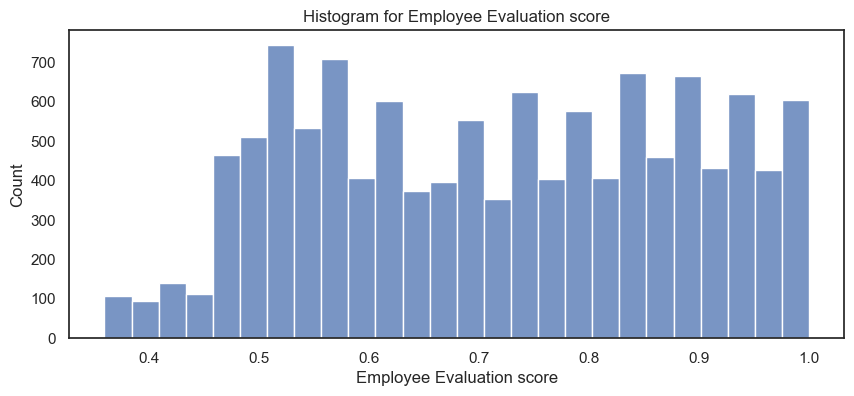

In [23]:
plt.figure(figsize=(10,4))
sns.histplot(data=df_new, x='last_evaluation')
plt.xlabel('Employee Evaluation score')
plt.title("Histogram for Employee Evaluation score")
plt.show()

#### 9. Comparison of two histogram plots of last_evaluation based on if the employee left.

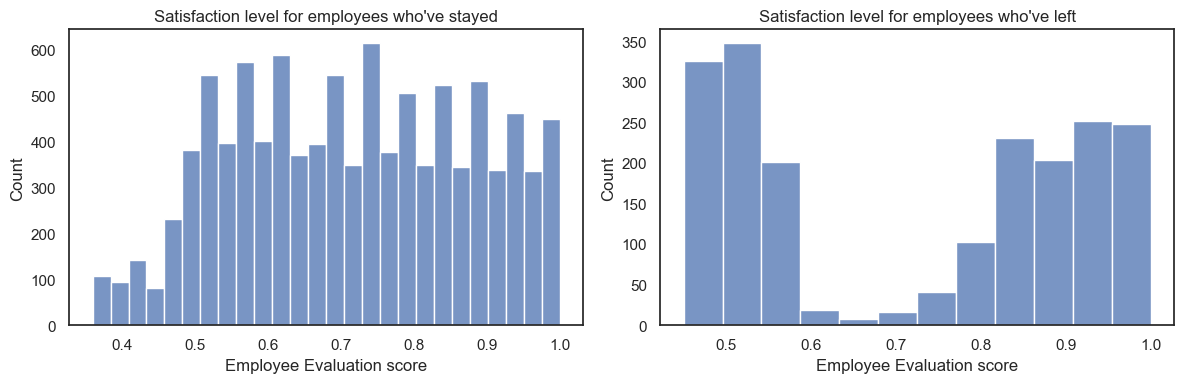

In [24]:
# plotting the histograms
fig, axes=plt.subplots(1,2, figsize=(12,4))
sns.histplot(df_stay, x='last_evaluation', ax=axes[0])
axes[0].set_xlabel('Employee Evaluation score')
axes[0].set_title('Satisfaction level for employees who\'ve stayed')

sns.histplot(df_left, x='last_evaluation', ax=axes[1])
axes[1].set_xlabel('Employee Evaluation score')
axes[1].set_title('Satisfaction level for employees who\'ve left')

plt.tight_layout()
plt.show()

Observations from the two employee evaluation histograms-

1. Majority of the employees stayed has a evaluation higher than 0.5
2. There are some employees who have low evaluation score, still they're working in the company
3. Majority of the employees who've left have a low evaluation score between 0.45 to 0.6
4. But some of them have higher evaluation score as well(>0.8).

#### 10. Relation between satisfaction level and evaluation score

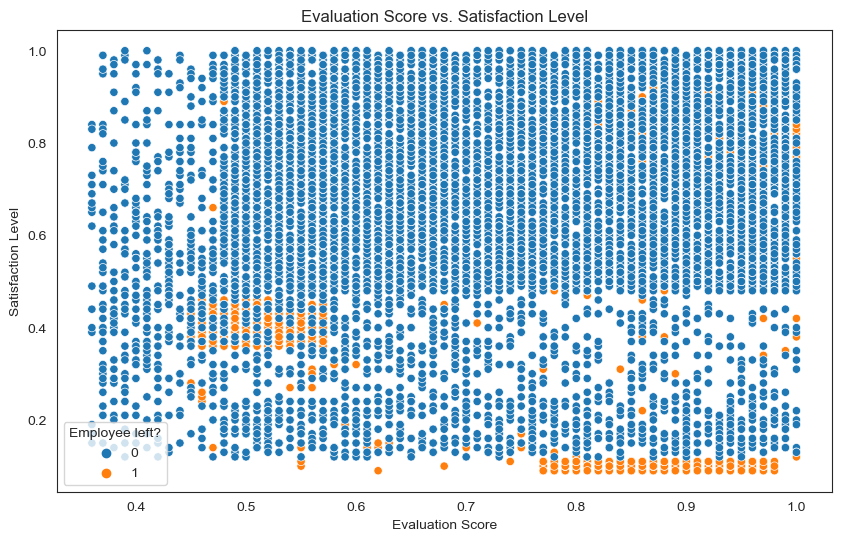

In [4]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_new, x = 'last_evaluation', y = 'satisfaction_level', hue = 'left')
plt.xlabel("Evaluation Score")
plt.ylabel("Satisfaction Level")
plt.title("Evaluation Score vs. Satisfaction Level")
plt.legend(title = "Employee left?")
plt.show()

From this scatterplot we can clearly see 2 groups of employees who've left and their status based on their satisfaction and evaluation score-

1. Group 1 has both lower satisfaction level as well as evaluation score
2. Group 2 has high evaluation score but low satisfaction level

Majority of the employee who've stayed in the company have satisfaction level and evaluation score between 0.5-1.0 and there are still people who stayed with low satisfaction level and evaluation score.

#### 11. A countplot of employee retention based on the number_project

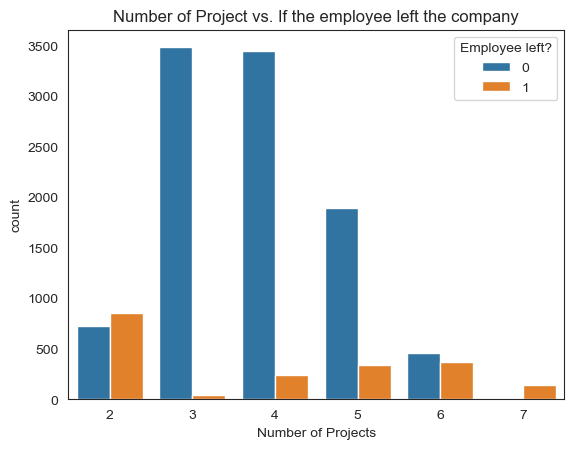

In [10]:
sns.countplot(data = df_new, x = 'number_project', hue = 'left')
plt.xlabel("Number of Projects")
plt.title("Number of Project vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.show()

The majority of the employees left had 2 projects. While the employee who've stayed had 3 or more projects. The number of remained employees decreases as number of project increases. The employees with 7 projects have all left.

So, the chance of turn over increases as employees are tasked with more projects.


#### 12. Scatterplot for Number of projects vs satisfaction level

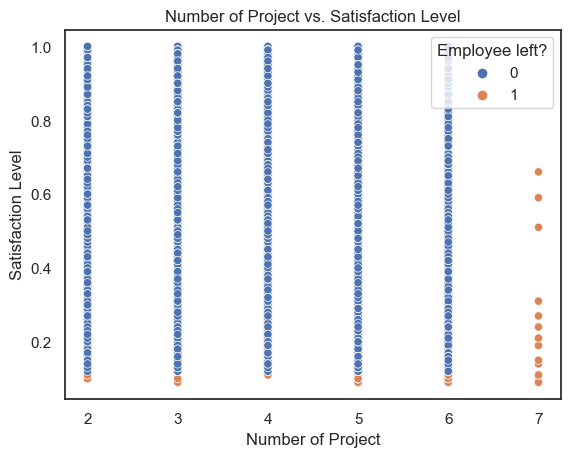

In [26]:
sns.scatterplot(data = df_new, x = 'number_project', y = 'satisfaction_level', hue = 'left')
plt.xlabel("Number of Project")
plt.ylabel("Satisfaction Level")
plt.title("Number of Project vs. Satisfaction Level")
plt.legend(title = "Employee left?")
plt.show()

In the histogram of Satisfaction Level, we saw some employees who've  left the company giving higher scores of satisfaction. When the employees leave the company, the satisfaction level is very low, except when they have 7 projects. So the employees who've 7 projects were satisfied with the company but nonetheless left the company because of some other reasons.

#### 13. Average monthly working hours Histogram

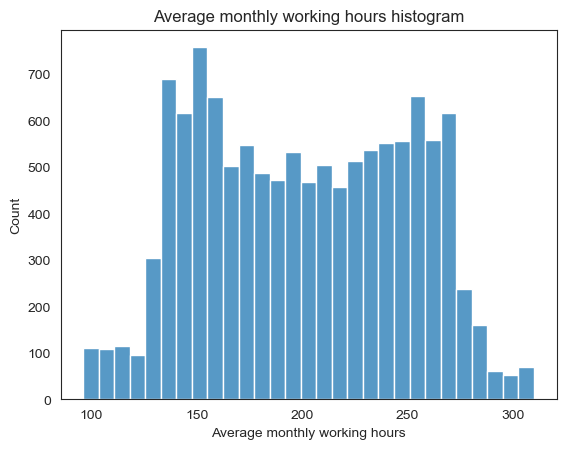

In [6]:
sns.histplot(df_new, x='average_monthly_hours')
plt.xlabel('Average monthly working hours')
plt.title('Average monthly working hours histogram')
plt.show()

#### 14. Boxplot for Monthly working hours Vs employee left the company or not

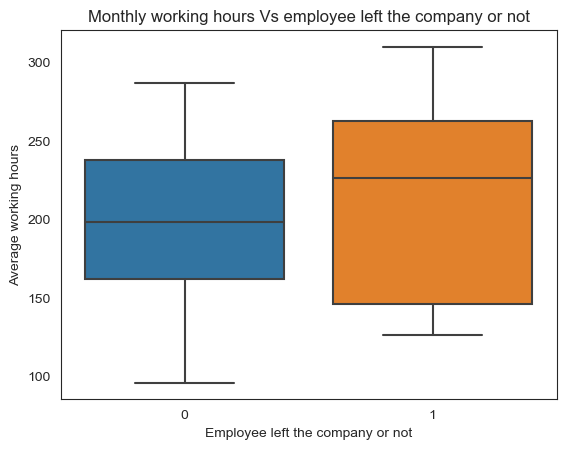

In [9]:
sns.boxplot(data=df_new, x='left', y='average_monthly_hours')
plt.xlabel('Employee left the company or not')
plt.ylabel('Average working hours')
plt.title('Monthly working hours Vs employee left the company or not')
plt.show()

In this boxplot, we can see the employees who left the company had more average monthly work hours than the employees who stayed in the company.

In [12]:
# average working hours per month
df_new['average_monthly_hours'].mean()

200.4735218080227

In [11]:
# gives the most frequent working hours for employees left and stayed
df_new['average_monthly_hours'].mode()

0    149
1    156
Name: average_monthly_hours, dtype: int64

According to [Zippia](https://www.zippia.com/answers/how-many-work-hours-are-in-a-month/) there are an average of around 176 work hours in a month. It is based on the assumption of 22 workdays in a month, a conventional five-day workweek, an average of the traditional 8-hour workday, and excludes both holidays and weekends. Working longer than ~176 is considered as working over time.

Keeping this in mind, we can see the minimum working hour is 96 hours/month i.e., ~4 hours/day and the maximum working hour is 310 hours/month i.e., ~13 hours/day. Moreover,the `average_monthly_hours` is ~ 200 hours which implies that most of the employees were working overtime.

Working overtime can be a reason of low satisfaction level in employees and it might influence an employee's decision to leave.

In [15]:
# percentage of employees working over time
overtime =(len(df_new[df_new['average_monthly_hours']>176])/df_new['average_monthly_hours'].shape[0]) *100
print(f'The percentage of employees working over 176 hours/month is {overtime:.2f}%')

The percentage of employees working over 176 hours/month is 63.06%


In [20]:
# creating a dataframe of overtime employees
overtime_emp=df_new[df_new['average_monthly_hours']>176]

# counting the overtime employees who've left
print(overtime_emp['left'].value_counts())
print('\n')

# percentage of the overtime employees who've left
percent_ot=len(overtime_emp[overtime_emp['left']==1])/overtime_emp['left'].shape[0] * 100
print(f'Percentage of overtime employees who\'ve left the company is {percent_ot:.2f}%')
print('\n')

# descriptive statistics for satisfaction level of overtime employees
overtime_emp['satisfaction_level'].describe()

0    6460
1    1101
Name: left, dtype: int64


Percentage of overtime employees who've left the company is 14.56%




count    7561.000000
mean        0.644238
std         0.251796
min         0.090000
25%         0.520000
50%         0.690000
75%         0.840000
max         1.000000
Name: satisfaction_level, dtype: float64

Among all the employees in Salifort Motors, 63.06% or 7561 employees worked overtime. Their average satisfaction level was 0.644, with 0.09 being lowest and 1 being highest.

#### 15. Scatterplot showing Average monthly hours VS Satisfaction Level

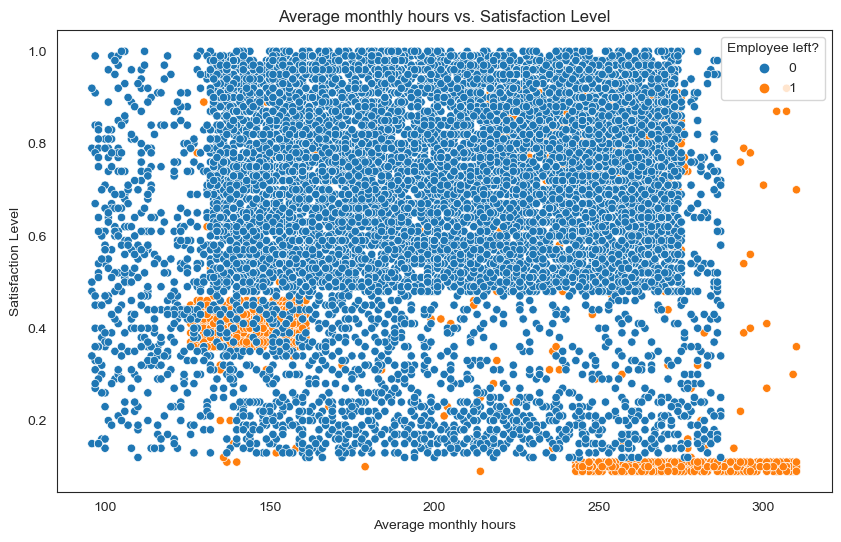

In [21]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df_new, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left')
plt.xlabel("Average monthly hours")
plt.ylabel("Satisfaction Level")
plt.title("Average monthly hours vs. Satisfaction Level")
plt.legend(title = "Employee left?")
plt.show()

This scatterplot shows us that employees who work between 250hr/month and 300hr/month tend to have very low satisfaction scores. Combining the histogram we had in the satisfaction_level section, most of the lowest scores came from here. Another big group of left employees had monthly work hours around 130-170 hr/month, their satisfaction levels are below the average.

#### 16. A boxplot and a regplot of employee retention based on the tenure.

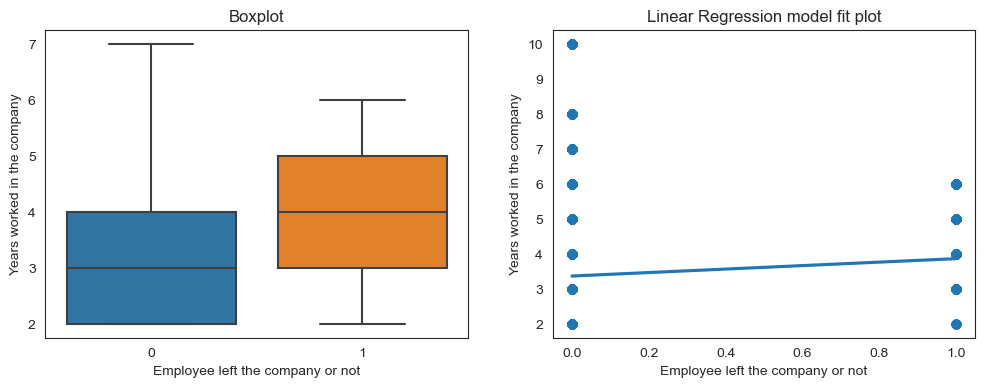

In [23]:
fig, axes = plt.subplots(1,2,figsize = (12,4))
sns.boxplot(data = df_new, x = 'left', y = 'tenure', showfliers = False, ax=axes[0])  # Exclude the outliers
axes[0].set_xlabel("Employee left the company or not")
axes[0].set_ylabel("Years worked in the company")
axes[0].set_title("Boxplot")

sns.regplot(data = df, x = 'left', y = 'tenure', ax=axes[1])
axes[1].set_xlabel("Employee left the company or not")
axes[1].set_ylabel("Years worked in the company")
axes[1].set_title("Linear Regression model fit plot")

plt.show()

From the boxplot we can see the employees who've left has a higher tenure than the employees who've stayed. The employees who work in the company longer are more likely to leave.

#### 17. A countplot of employee retention based on the work_accident.

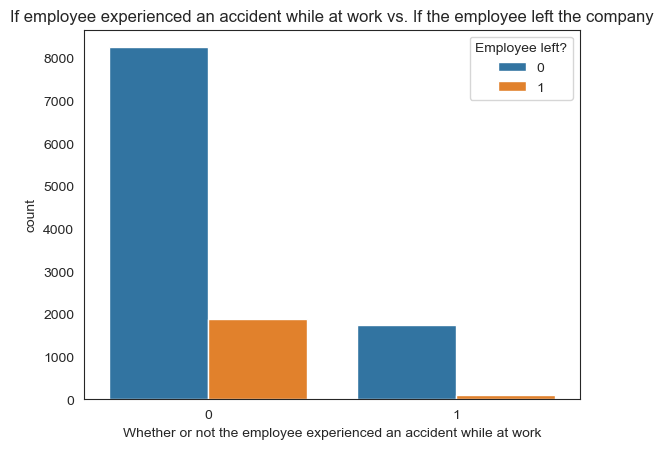

In [26]:
sns.countplot(data=df_new,x='work_accident', hue = 'left')
plt.xlabel("Whether or not the employee experienced an accident while at work")
plt.title("If employee experienced an accident while at work vs. If the employee left the company")

plt.legend(title = "Employee left?")
plt.show()

Through this plot, we can see that the employees who didn't experience an accident while at work have more possibilities of staying in the company.

#### 18. A countplot of employee retention based on the promotion_last_5years

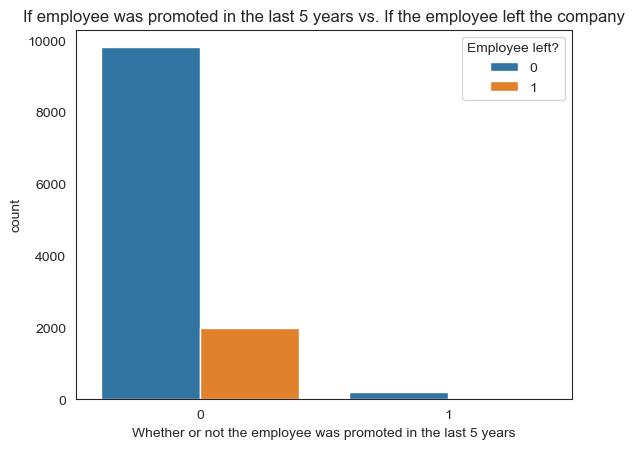

In [27]:
sns.countplot(data=df_new, x='promotion_last_5years', hue ='left')
plt.xlabel("Whether or not the employee was promoted in the last 5 years")
plt.title("If employee was promoted in the last 5 years vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.show()

In [28]:
df_new['promotion_last_5years'].value_counts()

0    11788
1      203
Name: promotion_last_5years, dtype: int64

In [37]:
promoted=df_new[df_new['promotion_last_5years']==1]
not_promoted=df_new[df_new['promotion_last_5years']==0]

promotion_stayed_perc = (len(promoted[promoted['left'] == 0])/promoted.shape[0])*100
promotion_left_perc = (len(promoted[promoted['left'] == 1])/promoted.shape[0])*100
nopromotion_stayed_perc = (len(not_promoted[not_promoted['left'] == 0])/not_promoted.shape[0])*100
nopromotion_left_perc = (len(not_promoted[not_promoted['left'] == 1])/not_promoted.shape[0])*100

print(f"The percentage of the employees who were promoted in the last 5 years and stayed in the company: {promotion_stayed_perc:.2f}%")
print(f"The percentage of the employees who were promoted in the last 5 years and left the company: {promotion_left_perc:.2f}%")
print(f"The percentage of the employees who were not promoted in the last 5 years and stayed in the company: {nopromotion_stayed_perc:.2f}%")
print(f"The percentage of the employees who were not promoted in the last 5 years and left the company: {nopromotion_left_perc:.2f}%")

The percentage of the employees who were promoted in the last 5 years and stayed in the company: 96.06%
The percentage of the employees who were promoted in the last 5 years and left the company: 3.94%
The percentage of the employees who were not promoted in the last 5 years and stayed in the company: 83.18%
The percentage of the employees who were not promoted in the last 5 years and left the company: 16.82%


Even though in this dataset, we only have 203 employees who were promoted in the last 5 years, we can still see the employees who were promoted in the last 5 years had more possibilities to stay in the company than those employees who weren't promoted.

#### 19. Two countplots of employee retention based on the department.

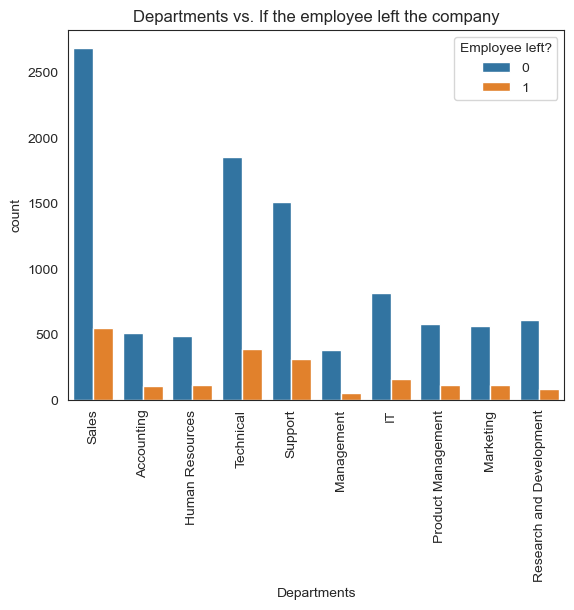

In [5]:
sns.countplot(data=df_new, x='department', hue ='left')
plt.xlabel("Departments")
plt.title("Departments vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.xticks(rotation = 90)
plt.show()

Through the plots, we can see the department of management has the lowest number of leaving, and the sales department has the highest number of leaving, compared to other departments in the dataset.

#### 20. A countplots of employee retention based on the salary (level).

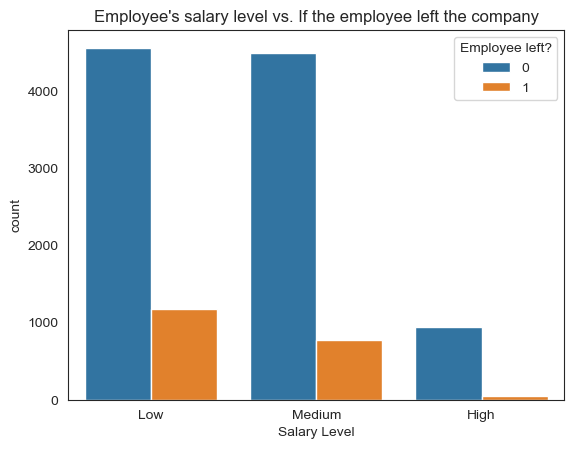

In [48]:
sns.countplot(data=df_new, x='salary', hue ='left')
plt.xlabel("Salary Level")
plt.title("Employee's salary level vs. If the employee left the company")
plt.legend(title = "Employee left?")
plt.show()

In [6]:
# Total number of employees based on Salary
df_new['salary'].value_counts()

Low       5740
Medium    5261
High       990
Name: salary, dtype: int64

In [14]:
# Total number of employees who've left based on salary
df_new['left'].groupby(df_new['salary']).sum()

salary
High        48
Low       1174
Medium     769
Name: left, dtype: int64

From this plot, we can see that when the salary level goes up, the possibility of leaving is decreased.

### Saving the df_new dataframe as a csv file to work with later for modelling

In [5]:
df_new.to_csv(r'C:\Users\Dell\Desktop\Projects\Salifort Motors\salifort_data_for_modelling.csv')

### Summary of the EDA


1. The dataset doesn't contain any missing value but has **3008 duplicated values**. We've removed those and created a new dataset df_raw with 11991 rows.

2. In the last_evaluation column, the minimum score was 0.36, it doesn't contain the score below to 0.36. In the average_monthly_hours column, it has a very large standard deviation as well as the range. The tenure has a similar situation as the last_evaluation column, there is no data for employees who worked less than 2 years.

3. **'left' will be our target variable**. We realize the majority class is about 83.4% of the data set, it is moderately imbalanced (~20%).

4. There are **10 Departments** in this dataset. The department of **Sales** has the highest number of employee retention.

5. There are 3 salary levels in this dataset. Majority of the left employees have a **low salary level**, followed by medium and high. When the salary level goes up, the possibility of leaving is decreased.

6. The employees who left the company tended to have **lower satisfaction levels** than the employees who stayed in the company. The lowest satisfaction level scores were more likely given by the employees who have left the company, but we still see numbers of stayed employees given very low satisfaction scores.

7. The employees who left the company had a similar but an **average higher score in the last performance** than the employees who stayed in the company. Majority of the employees stayed has a evaluation higher than 0.5. There are some employees who have low evaluation score, still they're working in the company. Majority of the employees who've left have a low evaluation score between 0.45 to 0.6 But some of them have higher evaluation score as well.

8. When the employees only have **2 projects**, the **possibility of turnover is the most** compared to other numbers of projects. When the employees have 3 projects, the possibilities of turn over is smallest. In addition, all the employees are left when they have 7 projects. The chance of turn over increases as employees are tasked with more projects.

9. In the histogram of Satisfaction Level, we saw some employees who've  left the company giving higher scores of satisfaction. When the employees leave the company, the satisfaction level is very low, except when they have 7 projects. So the employees who've 7 projects were satisfied with the company but nonetheless left the company because of some other reasons.

10. The employees who left the company had more average monthly work hours than the employees who stayed in the company. By checking the average_monthly_hour, we can find 96 was the minimum monthly working hour, and 310 was the maximum monthly working hour. 149 and 156 are the most frequent monthly working hours.

11. There is **63% of employees who worked over 176 hours/month**. The percentage of employee who worked over 176 hours/month and left the company is around 14.56%.

12.  **Working overtime can be a reason of low satisfaction level in employees and it might influence an employee's decision to leave.**

13. The employees who work in the company longer(tenure) tend to have more possibility of leaving.

14. The employees who didn't experience an accident while at work were more likely to stay in the company.

15. The employees who were promoted in the last 5 years were more likely to stay in the company.

16. **'satisfaction_level' has more relationship with left**, compared to other variables. We see the lowest satisfaction level is below 0.1, and it has a large number of employees who had the similar rate. Other than that, there are also a large number of the employees who had a satisfaction level higher than 0.56.

#### References used in EDA:

* [Exploratory Data Analysis](https://www.ibm.com/topics/exploratory-data-analysis)
* [11 essential code blocks exploratory data analysis](https://www.kdnuggets.com/2021/03/11-essential-code-blocks-exploratory-data-analysis.html)
* [10 things to do when conductiong your exploratory data analysis](https://medium.com/data-folks-indonesia/10-things-to-do-when-conducting-your-exploratory-data-analysis-eda-7e3b2dfbf812)
* [DataFrame pandas 2.1.0 documentation](https://pandas.pydata.org/docs/reference/frame.html)
* [Seaborn - A complete data visualization guide](https://www.kaggle.com/code/berkayalan/seaborn-a-complete-data-visualization-guide)
* [Seaborn regplot()](https://www.geeksforgeeks.org/python-seaborn-regplot-method/)
* [Seaborn Heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)
* [Seaborn Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
* [How many work hours are in a month?](https://www.zippia.com/answers/how-many-work-hours-are-in-a-month/)
* [Rotate x-tick label in matplotlib](https://www.geeksforgeeks.org/how-to-rotate-x-axis-tick-label-text-in-matplotlib/)